<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Matplot_pyplot_JP_example0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
# Matplotlib pyplot tutorial 日本語
* API
 * https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
* Tutorial
 * https://matplotlib.org/tutorials/index.html

---


# 日本語化 おまじない

```
!pip install japanize_matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns #フォントの設定のためseabornを使う

sns.set(font="IPAexGothic") #日本語フォント設定
```



In [0]:
!pip install japanize_matplotlib

In [0]:
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns

sns.set(font="IPAexGothic") #日本語フォント設定

Text(0.5, 1.0, '折れ線グラフ')

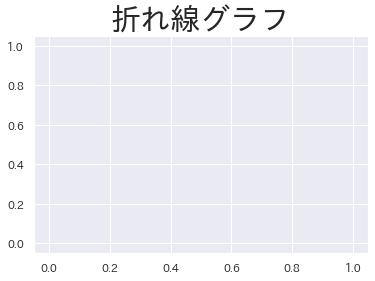

In [3]:
ax = plt.plot(figsize=(10,5))
plt.title('折れ線グラフ', fontsize=30)

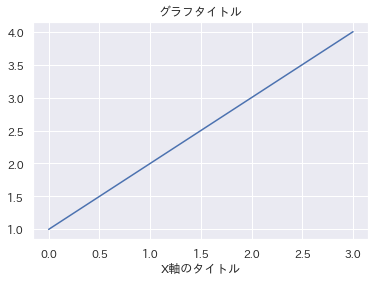

In [5]:
plt.plot([1, 2, 3, 4])
plt.xlabel('X軸のタイトル')
plt.title('グラフタイトル')
plt.show()



---



---



---



東京都データオープンデータカタログサイトより
 
 組織 三鷹市 【統計情報】町丁別世帯数及び人口報告書 町丁別世帯数及び人口報告書（平成31年）
 https://catalog.data.metro.tokyo.lg.jp/dataset/t132047d0000000006/resource/2b871eba-0723-4d90-9cb4-c9386c74b899

一回CSVでデータ見てみると、途中に小計・集計・年度などが入っているので、１年分（72行目までをDataFrameとして読み込んだ）

In [130]:
import requests
import pandas as pd
import io

url='http://www.city.mitaka.tokyo.jp/c_service/074/attached/attach_74198_2.csv'
r = requests.get(url)
res = requests.get(url).content
df = pd.read_csv(io.StringIO(res.decode('sjis')),header=1,index_col=0,nrows=72)
# nrows=72というのは試行錯誤です
df

,世帯数,人口（男）,人口（女）,総計
地域別（町丁目）,,,,
下連雀１丁目,1595,1473,1566,3039
下連雀２丁目,1828,1663,1758,3421
下連雀３丁目,6100,4757,5373,10130
下連雀４丁目,3424,3043,3276,6319
下連雀５丁目,1837,1756,2194,3950
...,...,...,...,...
大沢２丁目,956,1000,975,1975
大沢３丁目,1094,891,1040,1931
大沢４丁目,1380,1471,1556,3027


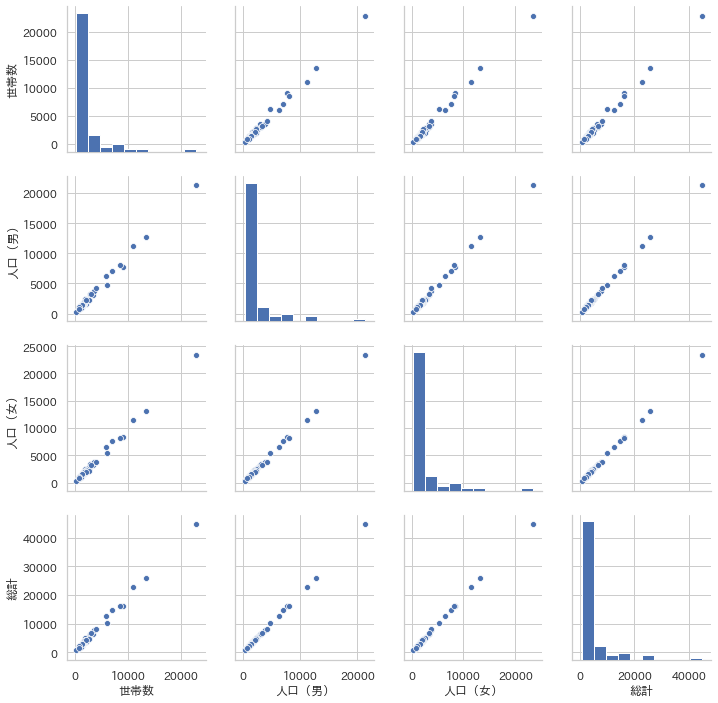

In [129]:
#seaborn の　pairplot でそれぞれの変数の関係をプロットしてみた
sns.pairplot(df)

なんかおかしいので。。データを見てみる

In [140]:
print(df.query('世帯数 > 6000'))

            世帯数  人口（男）  人口（女）     総計
地域別（町丁目）                            
下連雀３丁目     6100   4757   5373  10130
小計        22836  21263  23423  44686
小計        10964  11180  11544  22724
小計         9017   7709   8373  16082
小計         7092   7074   7523  14597
小計         8492   8038   8200  16238
小計        13463  12756  13133  25889


なんか。。途中に小計が入っているみたい。。

小計のないデータを抽出するには。。

In [135]:
print(df.query('世帯数 < 6101'))

           世帯数  人口（男）  人口（女）     総計
地域別（町丁目）                           
下連雀１丁目    1595   1473   1566   3039
下連雀２丁目    1828   1663   1758   3421
下連雀３丁目    6100   4757   5373  10130
下連雀４丁目    3424   3043   3276   6319
下連雀５丁目    1837   1756   2194   3950
...        ...    ...    ...    ...
大沢２丁目      956   1000    975   1975
大沢３丁目     1094    891   1040   1931
大沢４丁目     1380   1471   1556   3027
大沢５丁目      876   1041   1056   2097
大沢６丁目      773    785    765   1550

[66 rows x 4 columns]


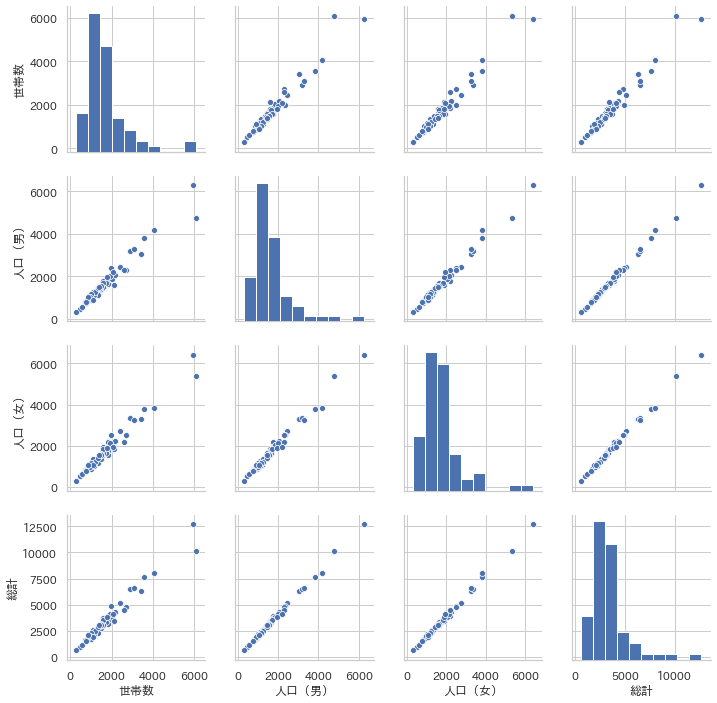

In [136]:
sns.pairplot(df.query('世帯数 < 6101'))

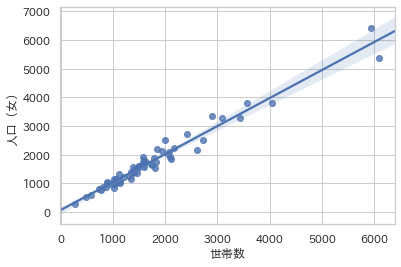

In [149]:
sns.regplot(x="世帯数", y="人口（女）", data=df.query("世帯数<6101"));

いちいちメンドクサイので、Dataframeを切り出し

In [151]:
df2=df.query("世帯数<6101")
df2

,世帯数,人口（男）,人口（女）,総計
地域別（町丁目）,,,,
下連雀１丁目,1595,1473,1566,3039
下連雀２丁目,1828,1663,1758,3421
下連雀３丁目,6100,4757,5373,10130
下連雀４丁目,3424,3043,3276,6319
下連雀５丁目,1837,1756,2194,3950
...,...,...,...,...
大沢２丁目,956,1000,975,1975
大沢３丁目,1094,891,1040,1931
大沢４丁目,1380,1471,1556,3027


In [94]:
df2.columns

Index(['世帯数', '人口（男）', '人口（女）', '総計'], dtype='object')

In [152]:
print(df2['人口（男）'].tolist())

[1473, 1663, 4757, 3043, 1756, 2002, 2430, 1774, 2365, 1007, 1845, 1186, 1654, 1376, 3172, 940, 2306, 1590, 1107, 1057, 1649, 2041, 1515, 1506, 2012, 768, 1022, 1015, 1001, 3806, 1075, 756, 1042, 1608, 1282, 2275, 1608, 1135, 866, 1667, 1374, 1470, 1423, 1681, 1532, 1966, 1253, 1030, 1553, 473, 6275, 851, 2212, 1125, 4188, 549, 1241, 1174, 336, 3300, 1462, 1000, 891, 1471, 1041, 785]


In [153]:
print(df2['世帯数'].tolist())

[1595, 1828, 6100, 3424, 1837, 2066, 2426, 1572, 1988, 1110, 2046, 1087, 1567, 1393, 2888, 873, 2723, 2117, 1306, 1139, 1732, 2169, 1479, 1498, 1946, 724, 920, 893, 1029, 3566, 1047, 748, 1067, 1639, 1386, 2605, 1806, 1339, 1013, 1756, 1467, 1581, 1419, 1591, 1491, 1792, 1124, 1053, 1484, 489, 5942, 810, 2096, 1134, 4040, 585, 1217, 1018, 275, 3095, 1335, 956, 1094, 1380, 876, 773]


In [157]:
import numpy as np
group_data = list(df2['世帯数'])
group_names = list(df2.index)
group_mean = np.mean(group_data)
print(group_mean)

1690.3636363636363


In [158]:
df2.index

Index(['下連雀１丁目', '下連雀２丁目', '下連雀３丁目', '下連雀４丁目', '下連雀５丁目', '下連雀６丁目', '下連雀７丁目',
       '下連雀８丁目', '下連雀９丁目', '牟礼１丁目', '牟礼２丁目', '牟礼３丁目', '牟礼４丁目', '牟礼５丁目',
       '牟礼６丁目', '牟礼７丁目', '井の頭１丁目', '井の頭２丁目', '井の頭３丁目', '井の頭４丁目', '井の頭５丁目',
       '中原１丁目', '中原２丁目', '中原３丁目', '中原４丁目', '北野１丁目', '北野２丁目', '北野３丁目', '北野４丁目',
       '小計', '新川１丁目', '新川２丁目', '新川３丁目', '新川４丁目', '新川５丁目', '新川６丁目', '上連雀１丁目',
       '上連雀２丁目', '上連雀３丁目', '上連雀４丁目', '上連雀５丁目', '上連雀６丁目', '上連雀７丁目', '上連雀８丁目',
       '上連雀９丁目', '井口１丁目', '井口２丁目', '井口３丁目', '井口４丁目', '井口５丁目', '小計', '深大寺１丁目',
       '深大寺２丁目', '深大寺３丁目', '小計', '野崎１丁目', '野崎２丁目', '野崎３丁目', '野崎４丁目', '小計',
       '大沢１丁目', '大沢２丁目', '大沢３丁目', '大沢４丁目', '大沢５丁目', '大沢６丁目'],
      dtype='object', name='地域別（町丁目）')

げっ。。まだ小計がいた(笑)

In [170]:
df2[df2.index!="小計"]

,世帯数,人口（男）,人口（女）,総計
地域別（町丁目）,,,,
下連雀１丁目,1595,1473,1566,3039
下連雀２丁目,1828,1663,1758,3421
下連雀３丁目,6100,4757,5373,10130
下連雀４丁目,3424,3043,3276,6319
下連雀５丁目,1837,1756,2194,3950
...,...,...,...,...
大沢２丁目,956,1000,975,1975
大沢３丁目,1094,891,1040,1931
大沢４丁目,1380,1471,1556,3027


In [0]:
df3=df2[df2.index!="小計"]

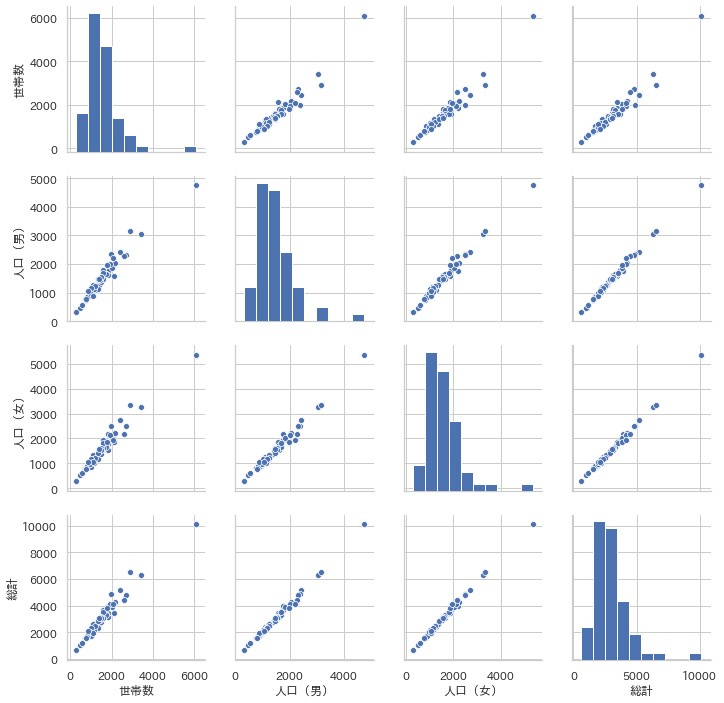

In [178]:
sns.pairplot(df3)

In [172]:
group_data = list(df3['世帯数'])
group_names = list(df3.index)
group_mean = np.mean(group_data)
print(group_mean)

1530.983870967742


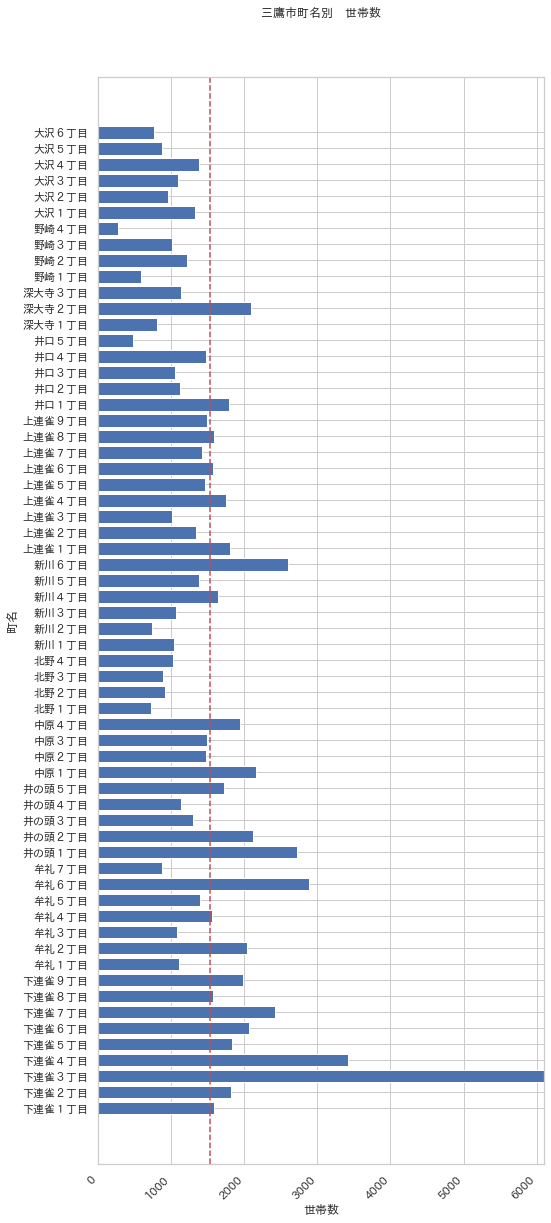

In [180]:
fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')


# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[0, 6100], xlabel='世帯数', ylabel='町名',
       title='三鷹市町名別　世帯数')

plt.show()


(array([[ 5.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 19.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 13.,  5.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  4.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([ 275. ,  857.5, 1440. , 2022.5, 2605. , 3187.5, 3770. , 4352.5,
        4935. , 5517.5, 6100. ]),
 array([  620.,  1571.,  2522.,  3473.,  4424.,  5375.,  6326.,  7277.,
         8228.,  9179., 10130.]),
 <matplotlib.collections.QuadMesh at 0x7fdd3f8a9b70>)

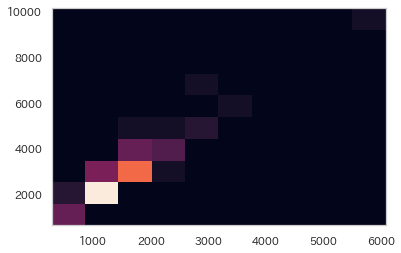

In [177]:
plt.hist2d(df3['世帯数'],df3['総計'])

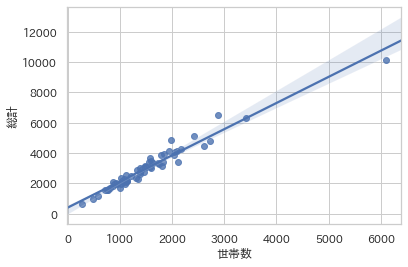

In [181]:
sns.regplot(x="世帯数", y="総計", data=df3);